# deep-q-learning

在普通q-learning中需要维护和更新一张记录状态对应奖励的qtable，巨量场景的情况下更新qtable是十分低效的，使用神经网络代替qtable，这个神经网络成为deep q-network（DQN）

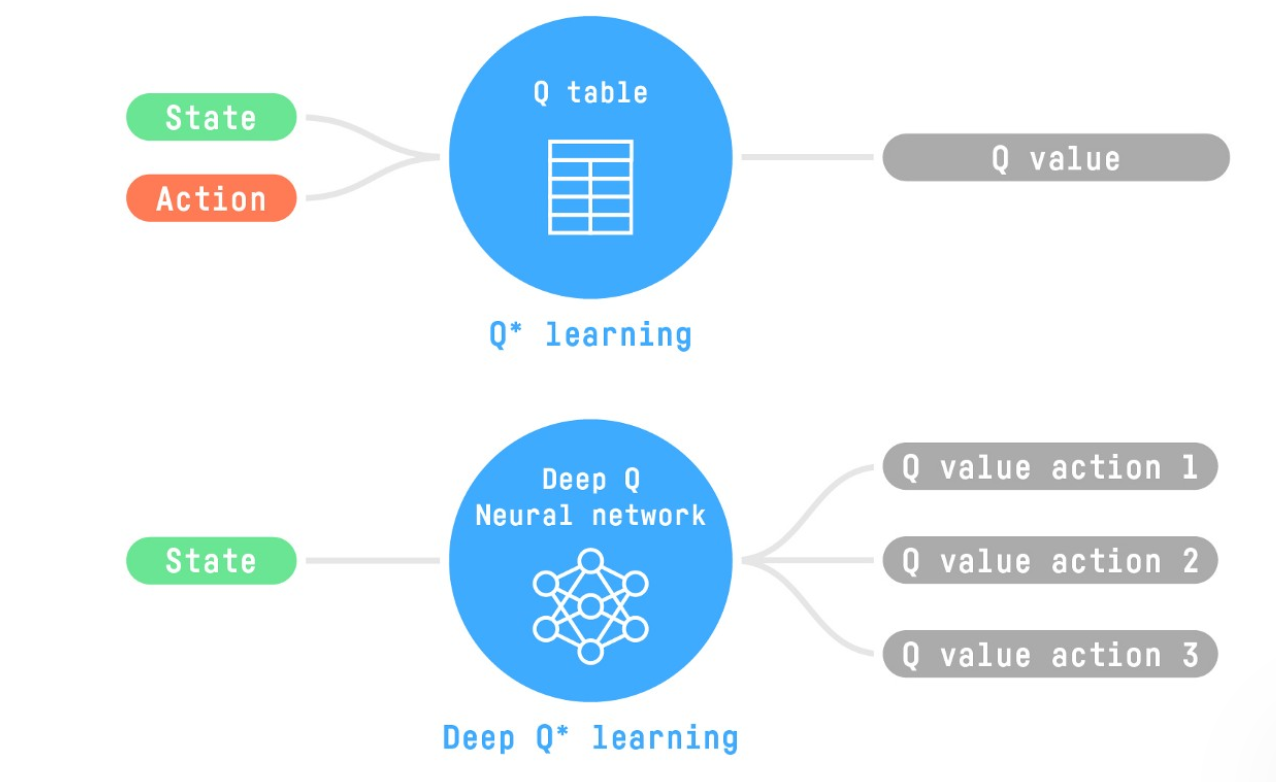

## DQN

在deep-q-learning中使用的神经网络结构，输入场景，输出执行的操作。具体：输入四帧游戏画面，输出操作向量（不同操作值softmax结果），并且同样使用epsilon-greedy策略来选择action

为什么是四帧画面而不是一帧，因为一帧不具有时间信息，比如无法知晓物体运动轨迹

四帧画面 ==》 卷积层 ==》全连接层 ==》 结果向量

## 损失函数

在DQN中，我们对神经网络预测的结果和真实的奖励结果的比较作为损失函数

真实奖励结果是怎么计算的呢（bellman等式）：当前场景下采取措施的奖励+折扣*下一场景的最高得分

下一场景的最高得分（q-value）也是输入场景给DQN，DQN返回的，所以一旦模型参数改动，该结果也会剧烈变化，所以训练过程会摆动。如何解决呢，我们可以使用一个单独的DQN模型专门用于获取下一场景最高分，这个DQN的模型参数每隔C步和原始DQN同步一次。这种模式称为**Dueling DQN**

## 训练模型

分两步，先采样即采集训练数据：采取行为并观察对应结果，将这些保存在回放内存中

训练：随机获取小批量数据训练

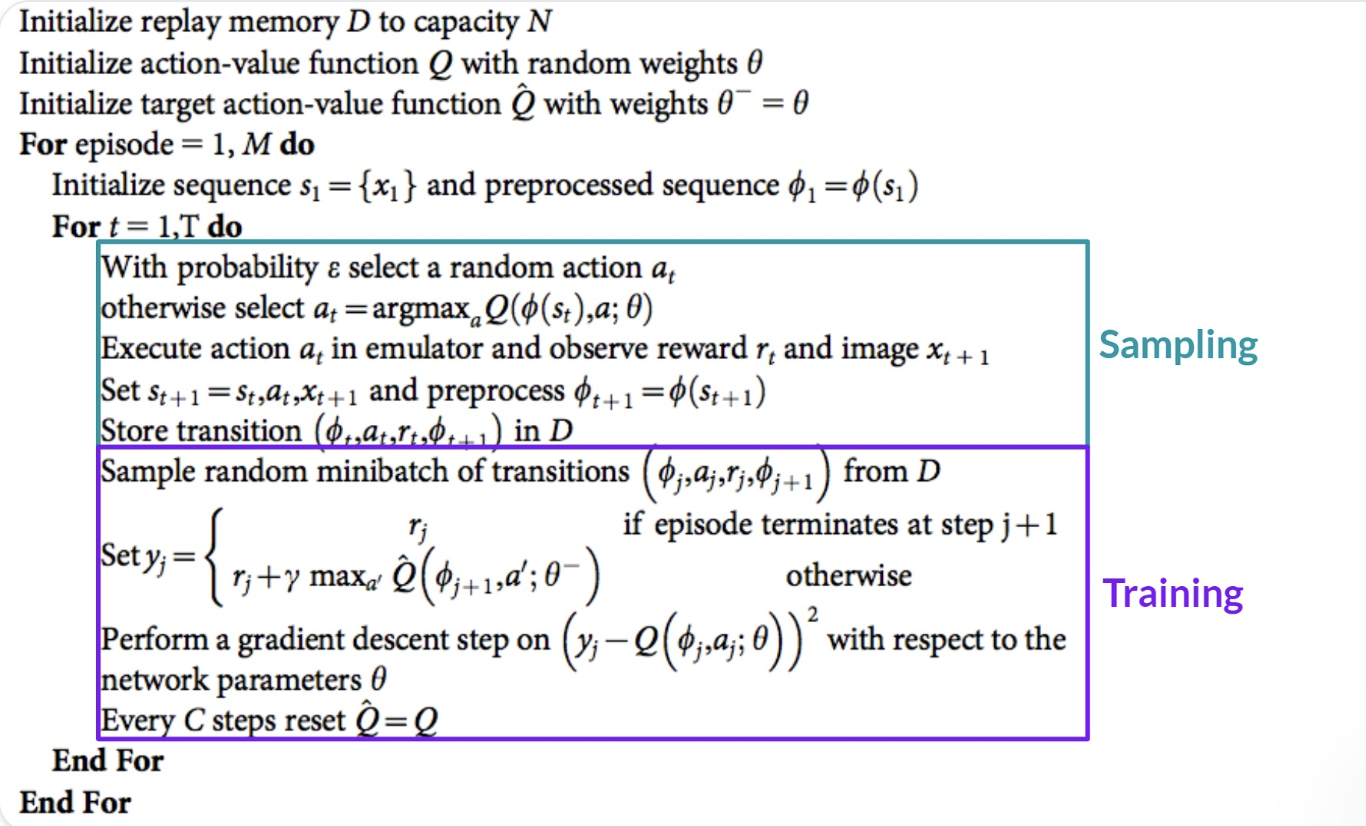

训练时：模型输入场景和行为，输出模型评估的奖励结果，和真实奖励结果做差值的平方，作为损失函数，然后反向传递

使用回放内存的另一个好处是训练的时候避免出现会做第二题后忘记怎么做第一题

## DoubleDQN

模型一开始的时候DQN给的action和场景的奖励结果肯定不是最优的，这样开始训练效果不好。解决方案：第一个DQN输入当前场景，输出最佳action，第二个目标DQN计算下一场景的q-value

In [ ]:
# 安装rl-baselines3-zoo 训练框架
!pip install git+https://github.com/DLR-RM/rl-baselines3-zoo
# 通过gymnasium游玩雅达利游戏
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]
# 虚拟显示
!pip3 install pyvirtualdisplay


In [1]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [ ]:
#train 这里直接调用了学习框架，没有手动实现DQN
python -m rl_zoo3.train --algo dqn  --env SpaceInvadersNoFrameskip-v4 -f logs/ -c dqn.yml

In [ ]:
# evaluate 评估
python -m rl_zoo3.enjoy  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --no-render  --n-timesteps 5000  --folder logs/